# Launch Delay Model

Brian M. Gardner <bgardne1@stevens.edu>
Paul T. Grogan <pgrogan@stevens.edu>

## Introduction

This script performs statistical analysis and probabilistic modeling for launch delays using a data set from selected International Space Station (ISS) United States Operating Segment (USOS) flights between 2012 and 2017.

In [49]:
from IPython.display import HTML, display
!pip install tabulate
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats

## Data Set

The analysis splits the data into three planning horizons:
 * Near-term: lead time between 0 and 90 days.
 * Intermediate: lead time between 90 and 180 days.
 * Long-term: lead time between 180 and 360 days.

In [32]:
lead = np.array([
    108, 156, 244, #143,
    273, 321, 390, 515, 426, 508, 
    509, 633, 783, 595, 689, 1032, 873, 998, 817, 960, 
    1148, 71, 131, #82,
    170, 230, 257, 382, 376, 376, 
    500, 285, 650, 462, 921, 899, 740, 865, 684, 827, 
    1025, 17, #43,
    144, 145, 295, 323, 263, 443, 387, 
    506, 624, 349, 540, 901, 702, 1213, 737, 936, 947, 
    61, 119, 205, 233, 196, 353, 332, 612, 534, 259, 
    450, 811, 612, 757, 647, 846, 857, 23, 89, 157, 
    204, 193, 312, 291, 375, 493, 218, 409, 770, 206, 
    716, 606, 805, 816, 38, 84, 108, 169, 239, 294, 
    302, 420, 145, 285, 697, 133, 643, 533, 732, 743, 
    48, 94, 107, 163, 163, 226, 344, 284, 260, 621, 
    422, 567, 457, 656, 667, 8, 22, 71, 110, 151, 
    216, 345, 213, 272, 638, 514, 586, 471, 585, 704, 
    42, 67, 115, 180, 309, 177, 236, 602, 370, 484, 
    413, 549, 550, 26, 67, 132, 261, 326, 188, 554, 
    342, 436, 382, 768, 502, 8, 121, 187, 252, 117, 
    480, 268, 362, 308, 694, 428, 47, 113, 178, 237, 
    496, 194, 288, 404, 620, 358, 19, 80, 52, 16])
delay = np.array([
    0, 47, 19, #201,
    149, 200, 217, 108, 251, 206, 
    279, 249, 174, 414, 429, 193, 369, 345, 617, 527, 
    411, -1, -1, #129,
    119, 158, 217, 108, 168, 205, 
    155, 464, 174, 414, 64, 193, 369, 345, 617, 527, 
    401, 0, #55,
    32, 130, 66, 54, 168, 25, 155, 
    130, 87, 414, 332, 78, 294, -116, 451, 305, 366, 
    25, 66, 66, 54, 145, 25, 120, -66, 87, 414, 
    332, 78, 294, 250, 451, 305, 366, 22, 55, 73, 
    42, 107, 25, 120, 130, 87, 414, 332, 78, 659, 
    250, 451, 305, 366, 33, 73, 65, 58, 25, 44, 
    130, 87, 414, 383, 78, 659, 250, 451, 305, 366, 
    33, 3, 44, 25, 99, 130, 87, 199, 332, 78, 
    294, 250, 451, 305, 366, 2, 4, 9, 7, 40, 
    69, 15, 199, 249, -10, 131, 160, 366, 305, 258, 
    2, 14, 40, 69, 15, 199, 249, -10, 239, 226, 
    388, 305, 376, 7, 40, 69, 15, 2, 249, -10, 
    219, 226, 371, 38, 376, 25, 6, 15, 2, 246,
    -10, 219, 226, 371, 38, 376, 6, 15, 2, 52, 
    -100, 219, 226, 201, 38, 372, 8, 0, 100, 14])

lead_90 = lead[lead <= 90]
delay_90 = delay[lead <= 90]
lead_180 = lead[np.logical_and(lead > 90, lead <= 180)]
delay_180 = delay[np.logical_and(lead > 90, lead <= 180)]
lead_360 = lead[np.logical_and(lead > 180, lead <= 360)]
delay_360 = delay[np.logical_and(lead > 180, lead <= 360)]

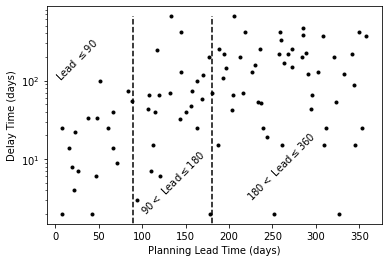

In [31]:
plt.figure()
plt.semilogy(lead[lead<360], delay[lead<360], '.k')
plt.annotate('Lead $\leq 90$', (25,100), ha='center', rotation=45)
plt.semilogy([90,90], [np.min(delay[lead<360]), np.max(delay[lead<360])], '--k')
plt.annotate('$90 <$ Lead$ \leq 180$', (135,2), ha='center', rotation=45)
plt.semilogy([180,180], [np.min(delay[lead<360]), np.max(delay[lead<360])], '--k')
plt.annotate('$180 <$ Lead$ \leq 360$', (260,3), ha='center', rotation=45)
plt.xlabel('Planning Lead Time (days)')
plt.ylabel('Delay Time (days)')
plt.show()

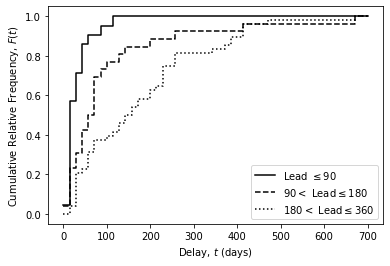

In [33]:
plt.figure()
t = np.linspace(0,np.round(np.max(delay), -2))
plt.step(t, [np.sum(delay_90 < i)/np.size(delay_90) for i in t], '-k', where='post', label='Lead $\leq 90$')
plt.step(t, [np.sum(delay_180 < i)/np.size(delay_180) for i in t], '--k', where='post', label='$90 <$ Lead$ \leq 180$')
plt.step(t, [np.sum(delay_360 < i)/np.size(delay_360) for i in t], ':k', where='post', label='$180 <$ Lead$ \leq 360$')
plt.xlabel('Delay, $t$ (days)')
plt.ylabel('Cumulative Relative Frequency, $F(t)$')
plt.legend()
plt.show()

In [34]:
display(HTML(tabulate([
    ["Lead", "Near-term", "Intermediate", "Long-term"],
    ["Count", f"{np.size(lead_90):.0f}", f"{np.size(lead_180):.0f}", f"{np.size(lead_360):.0f}"],
    ["Minimum", f"{np.min(lead_90):.0f}", f"{np.min(lead_180):.0f}", f"{np.min(lead_360):.0f}"],
    ["Maximum", f"{np.max(lead_90):.0f}", f"{np.max(lead_180):.0f}", f"{np.max(lead_360):.0f}"],
    ["Mean", f"{np.mean(lead_90):.1f}", f"{np.mean(lead_180):.1f}", f"{np.mean(lead_360):.1f}"],
    ["Std. Dev.", f"{np.std(lead_90, ddof=1):.1f}", f"{np.std(lead_180, ddof=1):.1f}", f"{np.std(lead_360, ddof=1):.1f}"]
], tablefmt='html')))

Lead,Near-term,Intermediate,Long-term
Count,21,26,48
Minimum,8,94,187
Maximum,89,180,358
Mean,45.5,138.7,268.2
Std. Dev.,26.3,26.0,50.5


In [35]:
display(HTML(tabulate([
    ["Delay", "Near-term", "Intermediate", "Long-term"],
    ["Count (Zero, %)", 
     f"{np.size(delay_90):.0f} ({np.sum(delay_90<=0):.0f}, {np.sum(delay_90<=0)/np.size(delay_90):.1%})", 
     f"{np.size(delay_180):.0f} ({np.sum(delay_180<=0):.0f}, {np.sum(delay_180<=0)/np.size(delay_180):.1%})", 
     f"{np.size(delay_360):.0f} ({np.sum(delay_360<=0):.0f}, {np.sum(delay_360<=0)/np.size(delay_360):.1%})"],
    ["Minimum", f"{np.min(delay_90):.0f}", f"{np.min(delay_180):.0f}", f"{np.min(delay_360):.0f}"],
    ["Maximum", f"{np.max(delay_90):.0f}", f"{np.max(delay_180):.0f}", f"{np.max(delay_360):.0f}"],
    ["Mean", f"{np.mean(delay_90):.1f}", f"{np.mean(delay_180):.1f}", f"{np.mean(delay_360):.1f}"],
    ["Std. Dev.", f"{np.std(delay_90, ddof=1):.1f}", f"{np.std(delay_180, ddof=1):.1f}", f"{np.std(delay_360, ddof=1):.1f}"]
], tablefmt='html')))

Delay,Near-term,Intermediate,Long-term
"Count (Zero, %)","21 (3, 14.3%)","26 (2, 7.7%)","48 (0, 0.0%)"
Minimum,-1,-1,2
Maximum,100,659,659
Mean,22.4,97.2,170.6
Std. Dev.,26.4,146.6,149.8


## Maximum Likelihood Estimation

In [37]:
def minus_log_likelihood_hybrid_weibull(params, obs):
    """
    Compute the minus log likelihood function for a hybrid Weibull distribution.
    
    Args:
        params (:obj:`list`): The Weibull distribution parameters (shape, scale).
        obs (:obj:`list`): The list of flight delay observations.
    
    Returns:
        float: the minus log likelihood value.
    """
    # determine the number of zero-delay launches
    N_0 = np.sum(obs<=0)
    # compute the probability mass for zero-delay
    p_0 = N_0/np.size(obs)
    # compute the probability density for each positive delay
    p_i = stats.weibull_min.pdf(obs[obs>0], params[0], loc=0, scale=params[1])
    if np.any(p_i == 0):
        # if any probability densities are zero, return an infinite value
        return np.inf
    elif N_0 > 0:
        # if there are any zero-delay launches, return the hybrid minus log likelihood
        return -N_0*np.log(p_0) - np.sum(np.log(p_i*(1-p_0)))
    else:
        # otherwise, return the simple minus log likelihood
        return -np.sum(np.log(p_i))

def mle_hybrid(fun, obs, params_0, bounds=None):
    """
    Maximize the log likehood value for a hybrid Weibull distribution.
    
    Args:
        fun (:obj:`function`): The minus log likelihood function.
        obs (:obj:`list`): The list of flight delay observations.
        params_0 (:obj:`list`): The initial value of Weibull distribution parameters (shape, scale).
        bounds (:obj:`list`, optional): The bounds for Weibull distribution parameters (shape, scale).
    
    Returns:
        (float, :obj:`list`): the probability mass (p_0) and distribution parameters (shape, scale).
    """
    # determine the number of zero-delay launches
    N_0 = np.sum(obs<=0)
    # compute the probability mass for zero-delay
    p_0 = N_0/np.size(obs)
    # minimize the minus log likelihood function
    res = optimize.minimize(fun, params_0, obs, method='SLSQP', bounds=bounds)
    # return the probability mass and distribution parameters
    return (p_0, res)

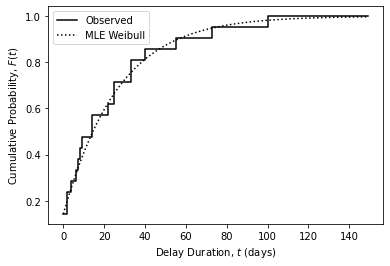

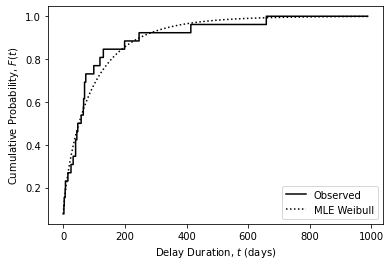

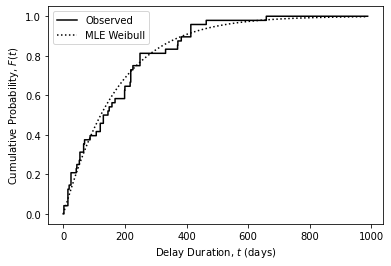

Horizon,Log Likelihood,Zero-delay p(0),Shape (α),Scale (γ)
Near-term,-85.40,14.3%,1.02,26.47
Intermediate,-141.75,7.7%,0.81,92.63
Long-term,-294.63,0.0%,1.04,172.93


In [47]:
LL = np.zeros(3)
p_0 = np.zeros(3)
shape = np.zeros(3)
scale = np.zeros(3)

for ii, obs in enumerate([delay_90, delay_180, delay_360]):
    p_0[ii], res = mle_hybrid(minus_log_likelihood_hybrid_weibull, obs, (1, 30))
    shape[ii] = res.x[0]
    scale[ii] = res.x[1]
    LL[ii] = -minus_log_likelihood_h_weibull(res.x, obs)
    
    plt.figure()
    t = np.arange(0,np.max(obs)*1.5)
    plt.step(t, [np.sum(obs <= i)/np.size(obs) for i in t], '-k', where='post', label='Observed')
    plt.plot(t, p_0[ii] + (1-p_0[ii])*stats.weibull_min.cdf(t, shape[ii], scale=scale[ii]), ':k', label='MLE Weibull')
    plt.xlabel('Delay Duration, $t$ (days)')
    plt.ylabel('Cumulative Probability, $F(t)$')
    plt.legend(loc='best')
    plt.show()
    
    """
    
    print('LL={:.2f}'.format(-minus_log_likelihood_h_weibull(res.x, obs)))
    print(r'Statistic & MLE & 95\% CI \\')
    print('Zero-delay p(0) & {:.1%}  & ({:.1%}, {:.1%}) \\'.format(
            p, np.percentile(p_0, 5), np.percentile(p_0, 95)).replace('%','\%'))
    print('Shape α & {:.2f} & ({:.2f}, {:.2f}) \\\\'.format(
            res.x[0], np.percentile(shape, 5), np.percentile(shape, 95)))
    print('Scale γ & {:.1f} & ({:.1f}, {:.1f}) \\\\'.format(
            res.x[1], np.percentile(scale, 5), np.percentile(scale, 95)))
    """
display(HTML(tabulate([
    ["Horizon", "Log Likelihood", "Zero-delay p(0)", "Shape (α)", "Scale (γ)"],
    ["Near-term", f"{LL[0]:.2f}", f"{p_0[0]:.1%}", f"{shape[0]:.2f}", f"{scale[0]:.2f}"],
    ["Intermediate", f"{LL[1]:.2f}", f"{p_0[1]:.1%}", f"{shape[1]:.2f}", f"{scale[1]:.2f}"],
    ["Long-term", f"{LL[2]:.2f}", f"{p_0[2]:.1%}", f"{shape[2]:.2f}", f"{scale[2]:.2f}"]
], tablefmt='html')))

## Bootstrapping Analysis

LL=-85.40
Statistic & MLE & 95\% CI \\
Zero-delay p(0) & 14.3\%  & (4.8\%, 24.0\%) \
Shape α & 1.02 & (0.87, 1.49) \\
Scale γ & 26.5 & (17.7, 41.2) \\


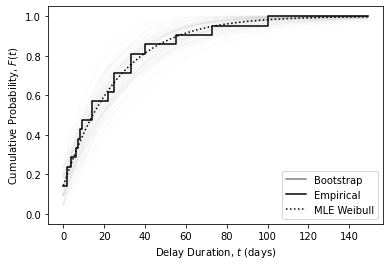

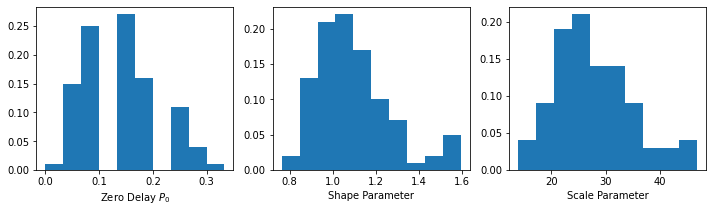

LL=-141.75
Statistic & MLE & 95\% CI \\
Zero-delay p(0) & 7.7\%  & (0.0\%, 15.4\%) \
Shape α & 0.81 & (0.68, 1.12) \\
Scale γ & 92.6 & (57.7, 145.6) \\


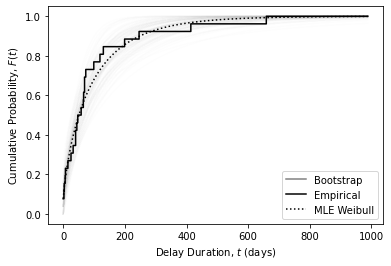

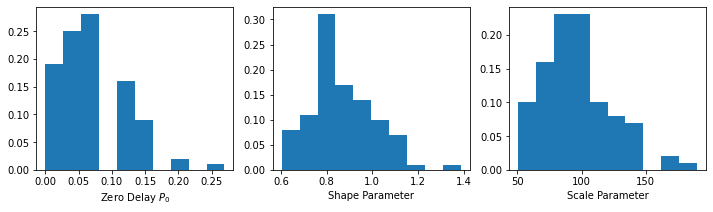

LL=-294.63
Statistic & MLE & 95\% CI \\
Zero-delay p(0) & 0.0\%  & (0.0\%, 0.0\%) \
Shape α & 1.04 & (0.86, 1.27) \\
Scale γ & 172.9 & (132.4, 219.8) \\


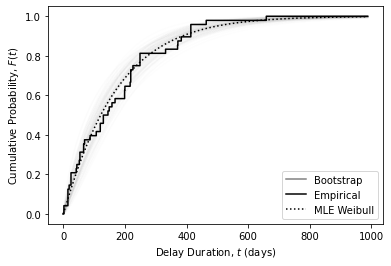

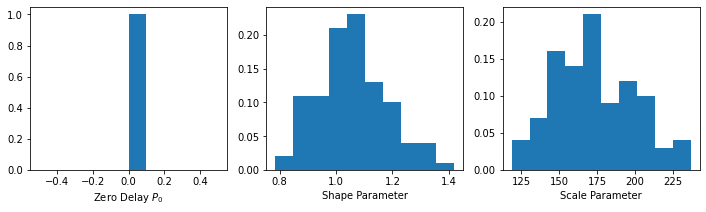

In [59]:
N_SAMPLES = 100
shape_mean = np.zeros(3)
scale_mean = np.zeros(3)

for ii, obs in enumerate([delay_90, delay_180, delay_360]):
    p_0 = np.zeros(N_SAMPLES)
    shape = np.zeros(N_SAMPLES)
    scale = np.zeros(N_SAMPLES)
    
    np.random.seed(0)
    
    for i in range(N_SAMPLES):
        obs_bootstrap = np.random.choice(obs, size=len(obs), replace=True)
        p_0[i], res = mle_hybrid(minus_log_likelihood_hybrid_weibull, obs_bootstrap, (1, 30))
        shape[i] = res.x[0]
        scale[i] = res.x[1]
    
    t = np.arange(0,np.max(obs)*1.5)
    plt.figure()
    
    for i in range(N_SAMPLES):
        F_t = p_0[i] + (1-p_0[i])*stats.weibull_min.cdf(t, shape[i], scale=scale[i])
        plt.plot(t, F_t, '-', color='grey', alpha=0.01, label='Bootstrap' if i == 0 else None)
    plt.step(t, [np.sum(obs <= i)/np.size(obs) for i in t], '-k', where='post', label='Empirical')
    p, res = mle_hybrid(minus_log_likelihood_h_weibull, obs, (1, 30))
    plt.plot(t, p + (1-p)*stats.weibull_min.cdf(t, res.x[0], scale=res.x[1]), ':k', label='MLE Weibull')
    
    p_0_mean[ii] = p
    shape_mean[ii] = res.x[0]
    scale_mean[ii] = res.x[1]
    
    plt.xlabel('Delay Duration, $t$ (days)')
    plt.ylabel('Cumulative Probability, $F(t)$')
    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    
    print('LL={:.2f}'.format(-minus_log_likelihood_h_weibull(res.x, obs)))
    print(r'Statistic & MLE & 95\% CI \\')
    print('Zero-delay p(0) & {:.1%}  & ({:.1%}, {:.1%}) \\'.format(
            p, np.percentile(p_0, 5), np.percentile(p_0, 95)).replace('%','\%'))
    print('Shape α & {:.2f} & ({:.2f}, {:.2f}) \\\\'.format(
            res.x[0], np.percentile(shape, 5), np.percentile(shape, 95)))
    print('Scale γ & {:.1f} & ({:.1f}, {:.1f}) \\\\'.format(
            res.x[1], np.percentile(scale, 5), np.percentile(scale, 95)))
    
    fig, axes = plt.subplots(1,3,figsize=(12,3))
    axes[0].hist(p_0, weights=np.ones_like(p_0)/np.size(p_0))
    axes[0].set_xlabel('Zero Delay $P_0$')
    axes[1].hist(shape, weights=np.ones_like(shape)/np.size(shape))
    axes[1].set_xlabel('Shape Parameter')
    axes[2].hist(scale, weights=np.ones_like(scale)/np.size(scale))
    axes[2].set_xlabel('Scale Parameter')
    plt.show()

## Quantization (Lloyd-Max Algorithm)

lloyd-max iteration 0 (mse = 59.920)
p(d=0) = 0.1429
p(d=14.29) = 0.5664
p(d=42.87) = 0.1954
p(d=71.45) = 0.0645
p(d=100.03) = 0.0209
p(d=128.61) = 0.0067
p(d=157.19) = 0.0022

lloyd-max iteration 1 (mse = 51.732)
p(d=0) = 0.1429
p(d=11.93) = 0.5374
p(d=40.30) = 0.2142
p(d=68.84) = 0.0713
p(d=97.39) = 0.0232
p(d=125.95) = 0.0075
p(d=154.52) = 0.0025

lloyd-max iteration 2 (mse = 47.212)
p(d=0) = 0.1429
p(d=11.10) = 0.5162
p(d=37.80) = 0.2244
p(d=66.24) = 0.0786
p(d=94.76) = 0.0257
p(d=123.30) = 0.0084
p(d=152.68) = 0.0028

lloyd-max iteration 3 (mse = 43.808)
p(d=0) = 0.1429
p(d=10.51) = 0.4992
p(d=35.85) = 0.2306
p(d=63.68) = 0.0853
p(d=92.14) = 0.0285
p(d=120.79) = 0.0094
p(d=151.10) = 0.0032

lloyd-max iteration 4 (mse = 41.082)
p(d=0) = 0.1429
p(d=10.06) = 0.4848
p(d=34.26) = 0.2347
p(d=61.31) = 0.0913
p(d=89.56) = 0.0314
p(d=118.39) = 0.0104
p(d=149.64) = 0.0035

lloyd-max iteration 5 (mse = 38.830)
p(d=0) = 0.1429
p(d=9.69) = 0.4723
p(d=32.92) = 0.2375
p(d=59.18) = 0.0965
p(d=87.

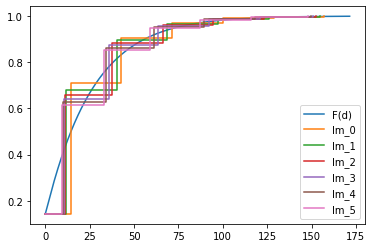

In [57]:
def f(t, p_0, gamma, alpha):
    return (1-p_0)*stats.weibull_min.pdf(t, gamma, loc=0, scale=alpha)

def F(t, p_0, gamma, alpha):
    return p_0 + (1-p_0)*stats.weibull_min.cdf(t, gamma, loc=0, scale=alpha)

def lloyd_max(a, t_min, t_max, f, p_0, gamma, alpha):
    # compute the interval bounds as the midpoints between each a, bounded by 0 and 90 days
    b = np.array([t_min] + [(a[i]+a[i+1])/2 for i in range(len(a)-1)] + [t_max])
    
    # compute the equivalent probability mass function by numerically integrating the PDF over each interval
    p_a = np.array([integrate.quad(f, b[i], b[i+1], args=(p_0,gamma,alpha))[0] for i in range(len(a))])
    
    def mse_fun(t, a, f, p_0, gamma, alpha):
        return f(t, p_0, gamma, alpha)*(t-a)**2
    
    # compute the mean square error between the PDF and derived PMF
    mse = np.sum([integrate.quad(mse_fun, b[i], b[i+1], args=(a[i],f,p_0,gamma,alpha))[0] for i in range(len(a))])
    
    def num_fun(t, f, p_0, gamma, alpha):
        return f(t, p_0, gamma, alpha)*t
    
    # compute the next values of a using lloyd-max algorithm
    next_a = np.array([
        integrate.quad(num_fun, b[i], b[i+1], args=(f,p_0,gamma,alpha))[0] 
        / integrate.quad(f, b[i], b[i+1], args=(p_0,gamma,alpha))[0] 
        for i in range(len(a))])
    
    return b, p_a, mse, next_a

# show the numerical results for an iteration of the lloyd-max algorithm
def show_results(i, a, p_a, mse, p_0):
    print('lloyd-max iteration {:d} (mse = {:.3f})'.format(i, mse))
    print('p(d=0) = {:.4f}'.format(p_0))
    for (i, p) in zip(a, p_a):
        print('p(d={:.2f}) = {:.4f}'.format(i, p))
    print()

t_min = 0
p_0 = p_0_mean[0]
shape = shape_mean[0]
scale = scale_mean[0]
t_max = stats.weibull_min.ppf((0.999-p_0)/(1-p_0), shape, loc=0, scale=scale)

# create a list of delay values
t, dt = np.linspace(t_min,t_max,1000, retstep=True)

a_0 = [t_min + (t_max-t_min)/n*(2*i+1)/2 for i in range(n)]

b_0, p_a_0, mse_0, a_1 = lloyd_max(a_0, t_min, t_max, f, p_0, gamma, alpha)
b_1, p_a_1, mse_1, a_2 = lloyd_max(a_1, t_min, t_max, f, p_0, gamma, alpha)
b_2, p_a_2, mse_2, a_3 = lloyd_max(a_2, t_min, t_max, f, p_0, gamma, alpha)
b_3, p_a_3, mse_3, a_4 = lloyd_max(a_3, t_min, t_max, f, p_0, gamma, alpha)
b_4, p_a_4, mse_4, a_5 = lloyd_max(a_4, t_min, t_max, f, p_0, gamma, alpha)
b_5, p_a_5, mse_5, a_6 = lloyd_max(a_5, t_min, t_max, f, p_0, gamma, alpha)

plt.figure()
plt.plot(t, F(t,p_0,gamma,alpha), label='F(d)')
plt.step(np.append([0], a_0), np.cumsum(np.append(p_0, p_a_0)), where='post', label='lm_0')
plt.step(np.append([0], a_1), np.cumsum(np.append(p_0, p_a_1)), where='post', label='lm_1')
plt.step(np.append([0], a_2), np.cumsum(np.append(p_0, p_a_2)), where='post', label='lm_2')
plt.step(np.append([0], a_3), np.cumsum(np.append(p_0, p_a_3)), where='post', label='lm_3')
plt.step(np.append([0], a_4), np.cumsum(np.append(p_0, p_a_4)), where='post', label='lm_4')
plt.step(np.append([0], a_5), np.cumsum(np.append(p_0, p_a_5)), where='post', label='lm_5')
plt.legend(loc='best')

show_results(0, a_0, p_a_0, mse_0, p_0)
show_results(1, a_1, p_a_1, mse_1, p_0)
show_results(2, a_2, p_a_2, mse_2, p_0)
show_results(3, a_3, p_a_3, mse_3, p_0)
show_results(4, a_4, p_a_4, mse_4, p_0)
show_results(5, a_5, p_a_5, mse_5, p_0)

In [61]:
for ii, horizon in enumerate(['Near-term', 'Intermediate', 'Long-term']):
    t_min = 0
    t_max = stats.weibull_min.ppf((0.999-p_0_mean[ii])/(1-p_0_mean[ii]), shape_mean[ii], loc=0, scale=scale_mean[ii])

    # create a list of delay values
    t = np.linspace(t_min, t_max, 1000)

    n = 6
    a = [t_min + (t_max-t_min)/n*(2*i+1)/2 for i in range(n)]
    prev_mse = mse = None
    num_iter = 0
    while prev_mse is None or mse is None or prev_mse-mse > 1e-3:
        prev_mse = mse
        num_iter+=1
        b, p_a, mse, a = lloyd_max(a, t_min, t_max, f, p_0_mean[ii], shape_mean[ii], scale_mean[ii])

    print(num_iter, a, p_a)

66 [  5.84873586  19.1764249   35.07731945  54.9131266   81.49494703
 122.45899988] [0.31882081 0.23109706 0.15390997 0.09171296 0.04544879 0.01515326]
92 [ 20.93436755  85.317714   169.93216061 283.00654979 443.04561661
 699.14703697] [0.43502616 0.23569972 0.13522967 0.07236402 0.03307397 0.01068338]
97 [ 37.99758575 123.05998728 224.22959113 350.52740219 520.38343848
 784.28568161] [0.36404206 0.2696995  0.18244823 0.11003626 0.05479349 0.01798046]
